Dados carregados com sucesso!
    Ano  Percentual de Energia Renovável  Número de Veículos Elétricos  \
0  2010                        31.601758                         52197   
1  2011                        36.578030                        144845   
2  2012                        35.518385                         76727   
3  2013                        36.562776                        102095   
4  2014                        30.908436                         83787   

   Eficiência Energética (kWh por PIB)  \
0                             0.242828   
1                             0.347233   
2                             0.208665   
3                             0.295381   
4                             0.379840   

   Investimentos em Energia Limpa (milhões de USD)  \
0                                              627   
1                                             1354   
2                                              754   
3                                              740   
4 

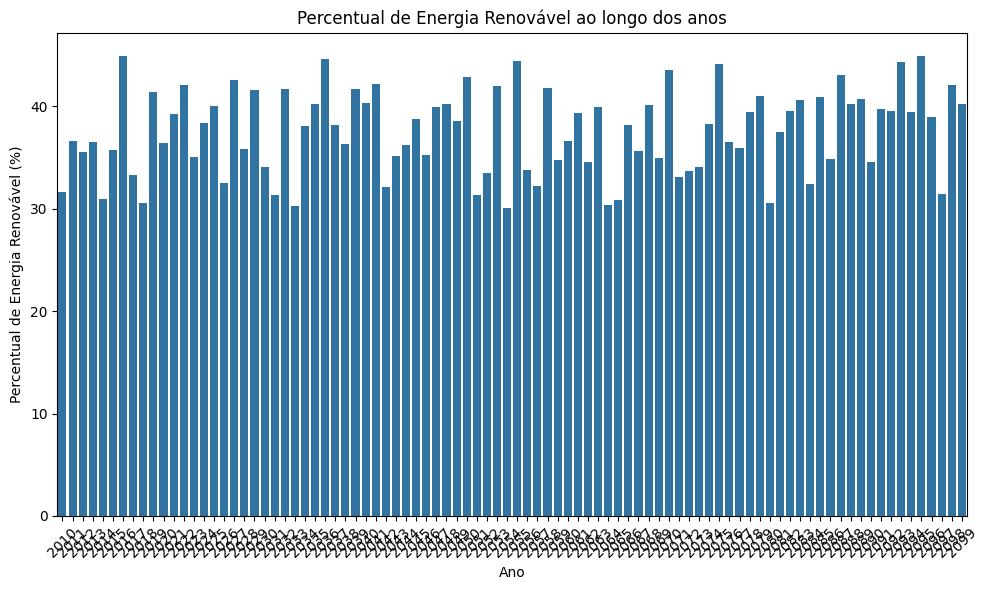

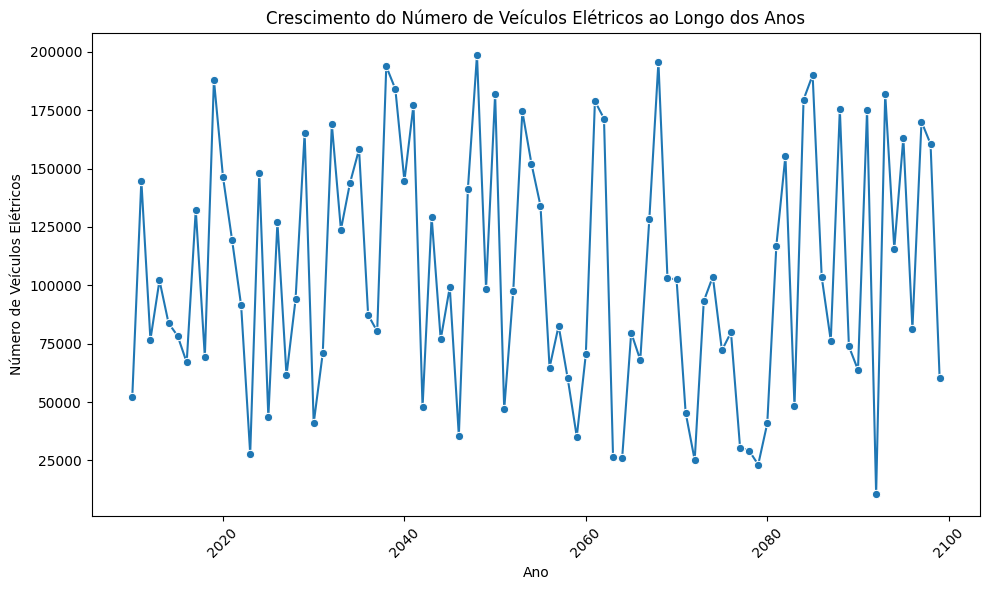


Coluna 'Setor', 'Categoria' ou 'Eficiência Energética (%)' não encontrada.

Coluna 'PIB (milhões de USD)' ou 'Investimentos em Energia Limpa (milhões de USD)' não encontrada.


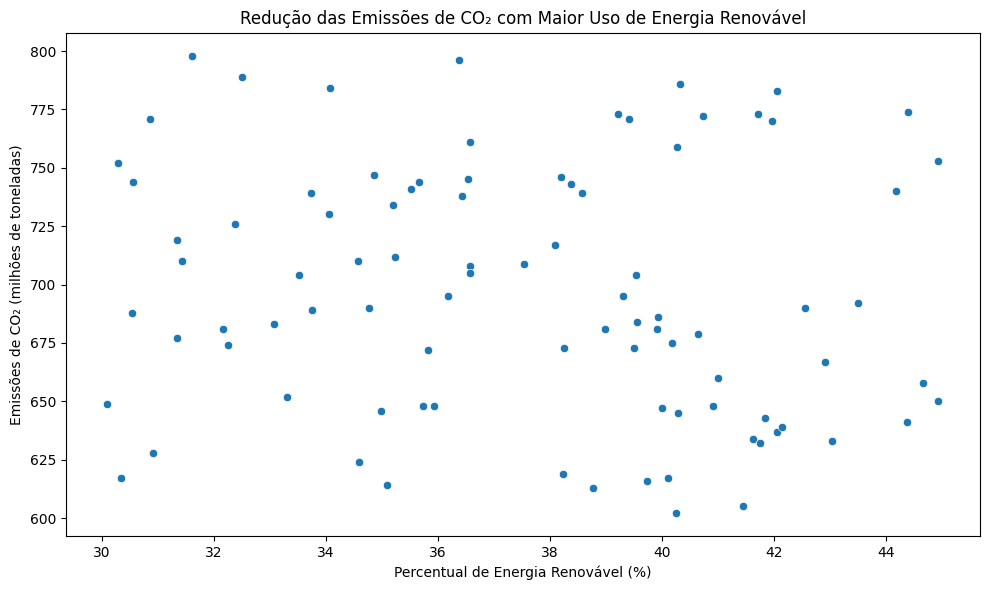


--- Modelo de Regressão ---
Mean Squared Error (MSE): 3832.98

Modelo salvo como modelo_regressao.pkl

--- Modelo de Classificação ---

Colunas necessárias para o modelo de classificação não encontradas. Verifique as colunas.

--- Modelo de Clusterização ---


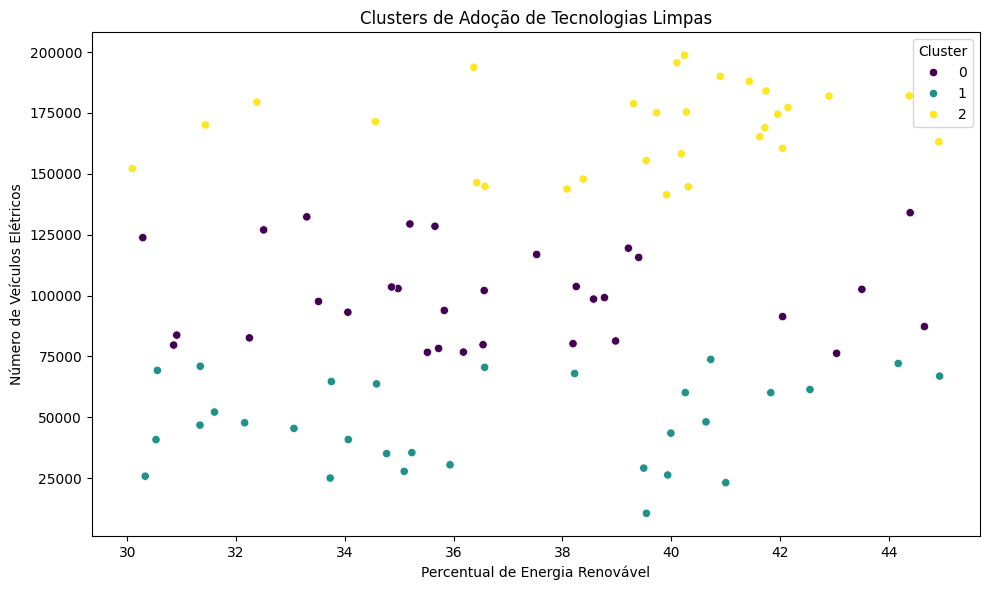


Modelo salvo como modelo_cluster.pkl


In [1]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, classification_report
import joblib

# Nome do arquivo
arquivo = "relatorio_energia.csv"

# Função para carregar dados
def carregar_dados(arquivo):
    try:
        dados = pd.read_csv(arquivo)
        print("Dados carregados com sucesso!")
        return dados
    except FileNotFoundError:
        print(f"Erro: O arquivo '{arquivo}' não foi encontrado.")
        exit()

# Carregar os dados
dados = carregar_dados(arquivo)

# Exibir as primeiras linhas
print(dados.head())

# Exibir as colunas para verificar os nomes corretos
print(f"Colunas disponíveis: {dados.columns}")

# --- Análise Exploratória ---
print("\n--- Análise Exploratória ---")
# Resumo estatístico
print(dados.describe())

# Média do percentual de energia renovável
if 'Percentual de Energia Renovável' in dados.columns:
    media_energia_renovavel = dados['Percentual de Energia Renovável'].mean()
    print(f"\nMédia do Percentual de Energia Renovável: {media_energia_renovavel:.2f}%")
else:
    print("\nColuna 'Percentual de Energia Renovável' não encontrada.")

# --- Gráficos ---
# Função para criar gráficos de barras
def grafico_barra(x, y, dados, titulo, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=x, y=y, data=dados)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Gráfico 1: Comparação entre fontes de energia
if 'Percentual de Energia Renovável' in dados.columns and 'Ano' in dados.columns:
    grafico_barra('Ano', 'Percentual de Energia Renovável', dados, 
                  'Percentual de Energia Renovável ao longo dos anos', 'Ano', 'Percentual de Energia Renovável (%)')

# Gráfico 2: Crescimento de veículos elétricos ao longo dos anos
if 'Número de Veículos Elétricos' in dados.columns and 'Ano' in dados.columns:
    plt.figure(figsize=(10, 6))
    sns.lineplot(x='Ano', y='Número de Veículos Elétricos', data=dados, marker='o')
    plt.title('Crescimento do Número de Veículos Elétricos ao Longo dos Anos')
    plt.xlabel('Ano')
    plt.ylabel('Número de Veículos Elétricos')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Função para verificar a coluna 'Setor' ou 'Categoria'
def verificar_coluna_setor(dados):
    setores_possiveis = ['Setor', 'Categoria']
    for setor in setores_possiveis:
        if setor in dados.columns:
            return setor
    return None

# Gráfico 3: Eficiência energética em diferentes setores
coluna_setor = verificar_coluna_setor(dados)
if coluna_setor and 'Eficiência Energética (%)' in dados.columns:
    grafico_barra(coluna_setor, 'Eficiência Energética (%)', dados, 
                  f'Eficiência Energética em Diferentes {coluna_setor}s', coluna_setor, 'Eficiência Energética (%)')
else:
    print("\nColuna 'Setor', 'Categoria' ou 'Eficiência Energética (%)' não encontrada.")

# Gráfico 4: Impacto econômico de inovações em energia limpa
if 'Investimentos em Energia Limpa (milhões de USD)' in dados.columns and 'PIB (milhões de USD)' in dados.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Investimentos em Energia Limpa (milhões de USD)', 
                    y='PIB (milhões de USD)', data=dados)
    plt.title('Impacto Econômico de Inovações em Energia Limpa')
    plt.xlabel('Investimentos em Energia Limpa (milhões de USD)')
    plt.ylabel('PIB (milhões de USD)')
    plt.tight_layout()
    plt.show()
else:
    print("\nColuna 'PIB (milhões de USD)' ou 'Investimentos em Energia Limpa (milhões de USD)' não encontrada.")

# Gráfico 5: Redução das emissões de CO₂ com maior uso de energia renovável
if 'Percentual de Energia Renovável' in dados.columns and 'Emissões de CO₂ (milhões de toneladas)' in dados.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Percentual de Energia Renovável', y='Emissões de CO₂ (milhões de toneladas)', data=dados)
    plt.title('Redução das Emissões de CO₂ com Maior Uso de Energia Renovável')
    plt.xlabel('Percentual de Energia Renovável (%)')
    plt.ylabel('Emissões de CO₂ (milhões de toneladas)')
    plt.tight_layout()
    plt.show()
else:
    print("\nColuna 'Emissões de CO₂ (milhões de toneladas)' não encontrada.")

# --- Modelos Preditivos ---
# Função para salvar modelos
def salvar_modelo(modelo, nome_arquivo):
    joblib.dump(modelo, nome_arquivo)
    print(f"\nModelo salvo como {nome_arquivo}")

# Modelo 1: Regressão (Prever a redução de emissões de CO₂ com base na adoção de energia renovável)
print("\n--- Modelo de Regressão ---")
if 'Percentual de Energia Renovável' in dados.columns and 'Emissões de CO₂ (milhões de toneladas)' in dados.columns:
    X = dados[['Percentual de Energia Renovável']]
    y = dados['Emissões de CO₂ (milhões de toneladas)']

    # Divisão entre treino e teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Treinamento do modelo
    modelo_regressao = LinearRegression()
    modelo_regressao.fit(X_train, y_train)

    # Previsões
    y_pred = modelo_regressao.predict(X_test)

    # Avaliação do modelo
    mse = mean_squared_error(y_test, y_pred)
    print(f'Mean Squared Error (MSE): {mse:.2f}')

    # Salvar modelo
    salvar_modelo(modelo_regressao, 'modelo_regressao.pkl')
else:
    print("\nColunas necessárias para o modelo de regressão não encontradas. Verifique as colunas.")

# Modelo 2: Classificação (Classificar regiões com base na eficiência energética)
print("\n--- Modelo de Classificação ---")
if all(col in dados.columns for col in ['Percentual de Energia Renovável', 
                                        'Investimentos em Energia Limpa (milhões de USD)', 
                                        'PIB (milhões de USD)', 'Região']):
    X_class = dados[['Percentual de Energia Renovável', 
                     'Investimentos em Energia Limpa (milhões de USD)', 
                     'PIB (milhões de USD)']]
    y_class = dados['Região']

    # Divisão entre treino e teste
    X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

    # Treinamento do modelo
    modelo_classificacao = RandomForestClassifier(n_estimators=100, random_state=42)
    modelo_classificacao.fit(X_train_class, y_train_class)

    # Previsões
    y_pred_class = modelo_classificacao.predict(X_test_class)

    # Avaliação do modelo
    print("\nClassificação Report:")
    print(classification_report(y_test_class, y_pred_class))

    # Salvar modelo
    salvar_modelo(modelo_classificacao, 'modelo_classificacao.pkl')
else:
    print("\nColunas necessárias para o modelo de classificação não encontradas. Verifique as colunas.")

# Modelo 3: Clusterização (Identificar padrões de adoção de tecnologias limpas)
print("\n--- Modelo de Clusterização ---")
if all(col in dados.columns for col in ['Percentual de Energia Renovável', 
                                        'Número de Veículos Elétricos', 
                                        'Emissões de CO₂ (milhões de toneladas)']):
    X_cluster = dados[['Percentual de Energia Renovável', 
                       'Número de Veículos Elétricos', 
                       'Emissões de CO₂ (milhões de toneladas)']]

    # Treinamento do modelo
    modelo_cluster = KMeans(n_clusters=3, random_state=42)
    dados['Cluster'] = modelo_cluster.fit_predict(X_cluster)

    # Visualização dos clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Percentual de Energia Renovável', 
                    y='Número de Veículos Elétricos', 
                    hue='Cluster', data=dados, palette='viridis')
    plt.title('Clusters de Adoção de Tecnologias Limpas')
    plt.xlabel('Percentual de Energia Renovável')
    plt.ylabel('Número de Veículos Elétricos')
    plt.tight_layout()
    plt.show()

    # Salvar modelo
    salvar_modelo(modelo_cluster, 'modelo_cluster.pkl')
else:
    print("\nColunas necessárias para o modelo de clusterização não encontradas. Verifique as colunas.")
